In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection

import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import seaborn

In [2]:
summ = pd.read_csv('data/atussum_2014.dat')

In [3]:
summ.drop(summ.columns[1], axis=1, inplace=True)
summ = summ.rename(columns={'tucaseid': 'TUCASEID'})

In [4]:
def get_activities(i):
    col_names = []
    col_names.append('TUCASEID')
    col_names.append('TEAGE')
    col_names.append('TESEX')
    col_names.append('PEEDUCA')
    col_names.append('PTDTRACE')
    for x in i.columns:
        if x.startswith(('t030111',
                         't030204',
                         't030303',
                         't030405',
                         't030504',
                         't040111',
                         't040204',
                         't040303',
                         't040405',
                         't040508',
                         't050104',
                         't050205',
                         't050305',
                         't050404',
                         't060103',
                         't060204',
                         't060303',
                         't060403',
                         't070105',
                         't080102',
                         't080203',
                         't080302',
                         't080403',
                         't080502',
                         't080602',
                         't080702',
                         't090104',
                         't090202',
                         't090302',
                         't090402',
                         't090502',
                         't1003',
                         't1102',
                         't1205',
                         't1303',
                         't140103',
                         't1507',
                         't1602')):
            col_names.append(x)
    return col_names

In [5]:
columns = get_activities(summ)

In [6]:
waiting = summ[columns]

In [7]:
get_total = [x for x in columns if x.startswith(('t'))]

In [8]:
waiting['total'] = waiting[get_total].sum(axis=1)

/Users/thescottrob/docy/.direnv/python-3.5.1/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


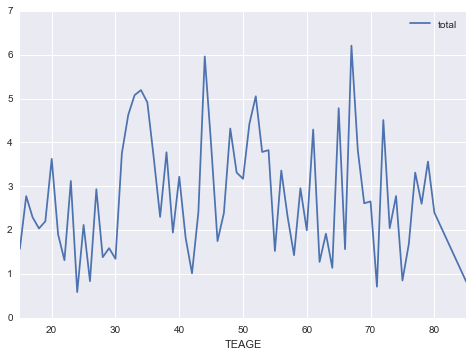

In [9]:
waiting_age = waiting.groupby('TEAGE').mean()
waiting_age = waiting_age.drop(waiting_age.columns[:-1], axis=1)
waiting_age.plot()
plt.show()

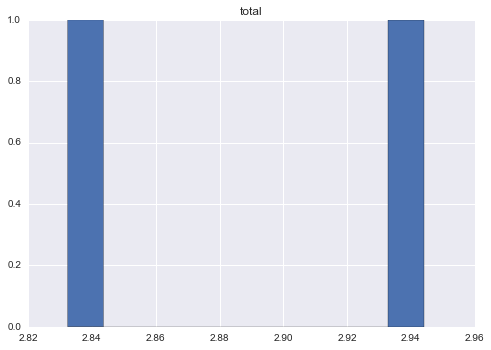

In [10]:
waiting_sex = waiting.groupby('TESEX').mean()
waiting_sex = waiting_sex.drop(waiting_sex.columns[:-1], axis=1)
waiting_sex.hist()
plt.show()

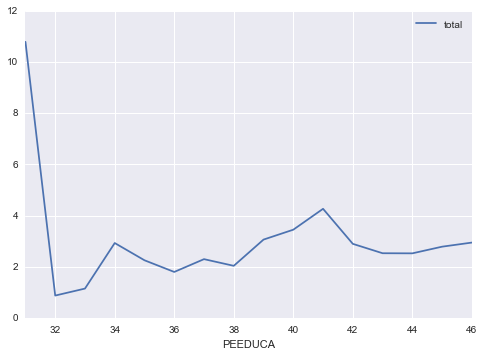

In [11]:
waiting_edu = waiting.groupby('PEEDUCA').mean()
waiting_edu = waiting_edu.drop(waiting_edu.columns[:-1], axis=1)
waiting_edu.plot()
plt.show()

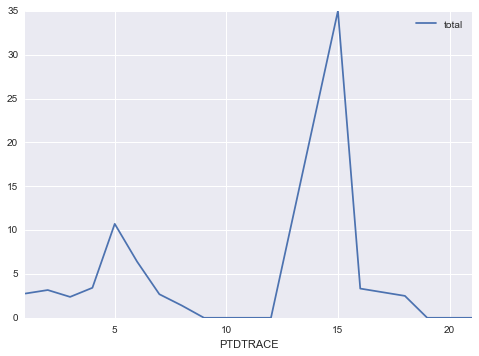

In [12]:
waiting_race = waiting.groupby('PTDTRACE').mean()
waiting_race = waiting_race.drop(waiting_race.columns[:-1], axis=1)
waiting_race.plot()
plt.show()